In [11]:
import pandas as pd

In [12]:
dataset= pd.read_csv("House Price India.csv")

In [13]:
dataset


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [14]:
dataset.corr()["Price"]   

#checking the highest correlation between the price and the data(bigger the value to 0 , bigger the correlation)

id                                      -0.773114
Date                                    -0.027919
number of bedrooms                       0.308460
number of bathrooms                      0.531735
living area                              0.712169
lot area                                 0.081992
number of floors                         0.262732
waterfront present                       0.263687
number of views                          0.395973
condition of the house                   0.041376
grade of the house                       0.671814
Area of the house(excluding basement)    0.615220
Area of the basement                     0.330202
Built Year                               0.050307
Renovation Year                          0.133173
Postal Code                             -0.115908
Lattitude                                0.297490
Longitude                                0.024414
living_area_renov                        0.584924
lot_area_renov                           0.075535


In [15]:
 dataset = dataset[["id" ,"Date","living area","grade of the house","Area of the house(excluding basement)","living_area_renov","number of bathrooms","Price","number of views"]] 

In [16]:
dataset.corr()["Price"]

id                                      -0.773114
Date                                    -0.027919
living area                              0.712169
grade of the house                       0.671814
Area of the house(excluding basement)    0.615220
living_area_renov                        0.584924
number of bathrooms                      0.531735
Price                                    1.000000
number of views                          0.395973
Name: Price, dtype: float64

In [17]:
import seaborn as sns

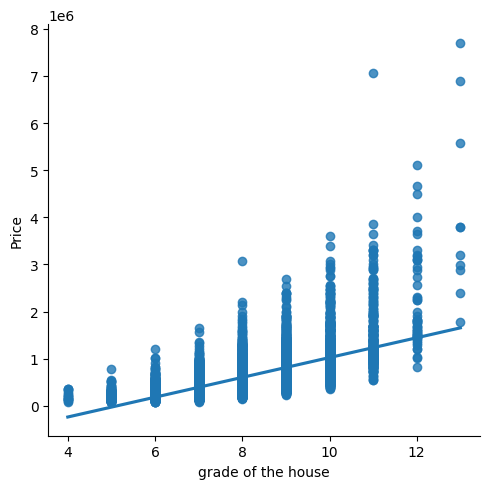

In [18]:
sns.lmplot(x="grade of the house", y="Price", data=dataset,fit_reg= True,ci=None)

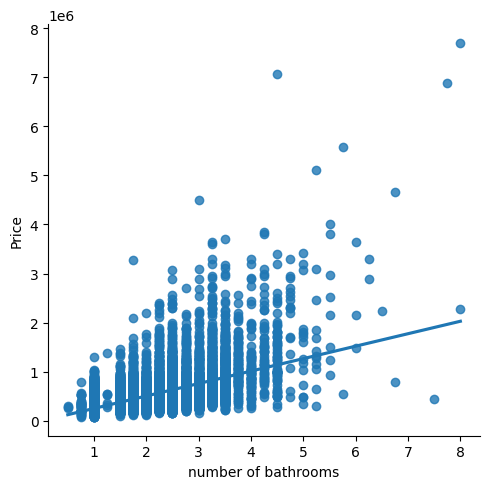

In [19]:
sns.lmplot(x="number of bathrooms", y="Price", data=dataset,fit_reg= True,ci=None)

<Axes: ylabel='Frequency'>

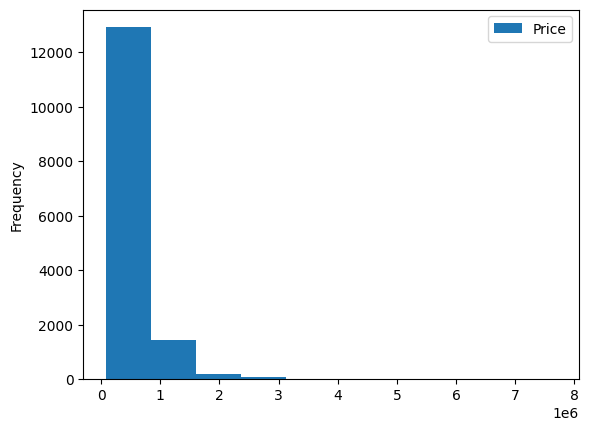

In [20]:
dataset.plot.hist(y="Price")

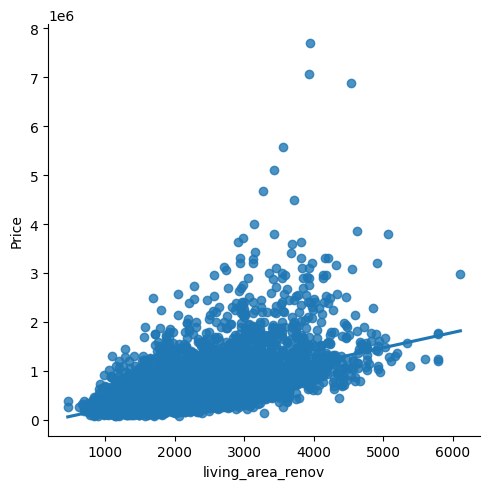

In [21]:
sns.lmplot(x="living_area_renov", y="Price", data=dataset,fit_reg= True,ci=None)

In [22]:
# dataset[dataset.isnull().any(axis=1)]
#no missing values so not needed

In [185]:
dataset.shape

(14620, 8)

In [29]:
train = dataset[dataset["Date"]<42680].copy()
test= dataset[dataset["Date"]>=42680].copy()
# dividing training and testing data into 80-20 ratio

In [30]:
train.shape

(12047, 9)

In [31]:
test.shape

(2573, 9)

In [32]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
# applying linear regression model

In [33]:
prediction = ["living area", "grade of the house","Area of the house(excluding basement)","living_area_renov","number of bathrooms","number of views"]

In [34]:
reg.fit(train[prediction],train["Price"]) 
#training prediction data set with Price

LinearRegression()

In [35]:
predictions= reg.predict(test[prediction])

In [36]:
predictions.shape


(2573,)

In [37]:
test["predictions"]=predictions

In [38]:
test.loc[test["predictions"]<0 ,"predictions"]=0
# any value in predictions which is less than 0 will be turned into 0

In [39]:
test["predictions"] = test["predictions"].round()
#rounding off the values 

In [40]:
test

,id,Date,living area,grade of the house,Area of the house(excluding basement),living_area_renov,number of bathrooms,Price,number of views,predictions
12047,6762810398,42680,4910,10,3580,3280,2.25,1680000,0,1283645.0
12048,6762810931,42680,4700,11,2660,3770,3.50,1240000,2,1505901.0
12049,6762811049,42680,4340,11,4340,3430,3.50,1190000,0,1197824.0
12050,6762811098,42680,4270,10,4270,4190,3.50,1160000,2,1246081.0
12051,6762811593,42680,2790,9,2790,2650,2.50,982000,0,750462.0
...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,1556,7,1556,2250,1.50,221700,0,354719.0
14616,6762830339,42734,1680,7,1680,1540,2.00,219200,0,373178.0
14617,6762830618,42734,1070,6,1070,1130,1.00,209000,0,194552.0
14618,6762830709,42734,1030,6,1030,1420,1.00,205000,0,182902.0


In [41]:
#now we will find the mean absolute error in our data base
from sklearn.metrics import mean_absolute_error
error=  mean_absolute_error(test["Price"],test["predictions"])
#passing actual values and our predictions


In [42]:
error


157933.71861640108

In [47]:
dataset.describe()["Price"]
# your error should be lower than std(standard deviation)

count    1.462000e+04
mean     5.389322e+05
std      3.675324e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Price, dtype: float64

In [48]:
test["predictions"] = predictions

In [49]:
test[test["living area"]==3650]

,id,Date,living area,grade of the house,Area of the house(excluding basement),living_area_renov,number of bathrooms,Price,number of views,predictions
13028,6762810788,42698,3650,9,1860,3150,3.0,1310000,3,1.211379e+06


In [50]:
errors = (test["Price"] - predictions).abs()

In [51]:
error_by_living_area = errors.groupby(test["living area"]).mean()
price_by_living_area = test["Price"].groupby(test["living area"]).mean()
error_ratio =  error_by_living_area / price_by_living_area

In [52]:
import numpy as np
error_ratio=error_ratio[np.isfinite(error_ratio)]

<Axes: ylabel='Frequency'>

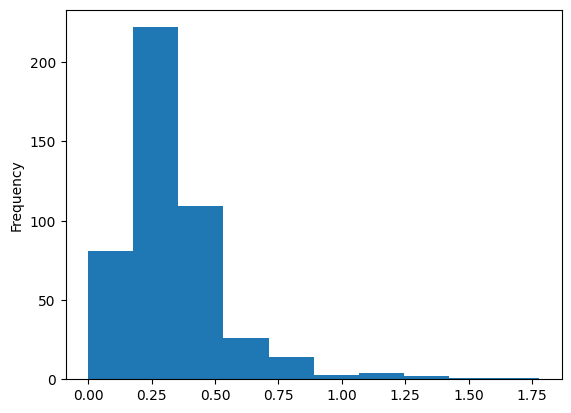

In [53]:
error_ratio.plot.hist()

In [54]:
error_ratio.sort_values()

living area
4420    0.000155
3750    0.005228
3120    0.006687
1522    0.015182
4160    0.018397
          ...   
2406    1.182734
2251    1.266994
3690    1.270175
460     1.491640
1752    1.778066
Name: Price, Length: 463, dtype: float64